## **ANÁLISIS DE DATOS DE EMPRESA MULTINACIONAL DESDE EL AÑO 2016 AL AÑO 2019**






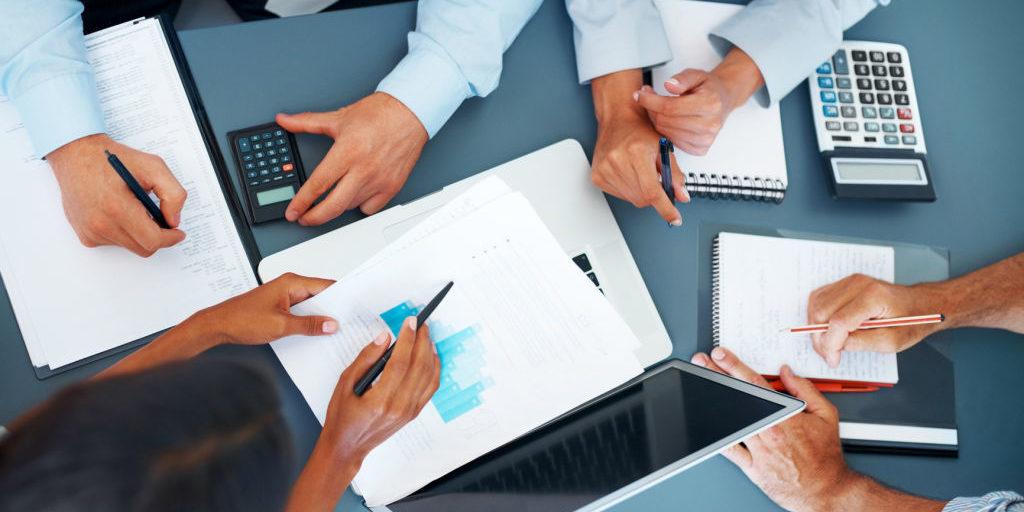

**Autor: Francisco Moyano Escalera**

**Fecha: Enero 2022** 

**Introducción:** en este notebook se analizarán datos referidos a ventas, costos y beneficio de una empresa multinacional.
A continuación se presentan los distintos pasos para el análisis de la base de datos:

**1) Se realiza la conexión con Google Drive, en donde se encuentra almacenada la base de datos**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2) Se importan las librerías de numpy, pandas, matplotlib, scipy y sklearn de Python** 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


**3) Se realiza la carga de la base de datos de la Empresa Multinacional y se la guarda en un dataframe de pandas**

In [3]:
df = pd.read_excel("/content/drive/MyDrive/Base de Datos Ventas/Base de datos Multinacional.xlsx")

**4) Se observa la información del dataframe**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266128 entries, 0 to 266127
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID Transacción    266128 non-null  int64         
 1   ID Factura        266128 non-null  int64         
 2   Fecha de Venta    266128 non-null  datetime64[ns]
 3   Fecha de Envío    266128 non-null  datetime64[ns]
 4   ID Producto       266128 non-null  int64         
 5   Producto          266128 non-null  object        
 6   Marca             266128 non-null  object        
 7   ID Vendedor       266128 non-null  int64         
 8   Vendedor          266128 non-null  object        
 9   Región de Ventas  266128 non-null  object        
 10  ID Cliente        266128 non-null  int64         
 11  Cliente           266128 non-null  object        
 12  País Cliente      266128 non-null  object        
 13  Cantidad          266128 non-null  int64         
 14  Vent

**5) Se observa la cantidad de filas y columnas del dataframe**

In [5]:
df.shape

(266128, 16)

**6) Se observa el número de elementos del dataframe**

In [6]:
df.size

4258048

**7) Se obtiene una lista con los nombres de las columnas existentes**

In [7]:
df.columns

Index(['ID Transacción', 'ID Factura', 'Fecha de Venta', 'Fecha de Envío',
       'ID Producto', 'Producto', 'Marca', 'ID Vendedor', 'Vendedor',
       'Región de Ventas', 'ID Cliente', 'Cliente', 'País Cliente', 'Cantidad',
       'Venta', 'Costo'],
      dtype='object')

**8) Se obtiene una serie con los tipos de datos de las columnas**




In [8]:
df.dtypes

ID Transacción               int64
ID Factura                   int64
Fecha de Venta      datetime64[ns]
Fecha de Envío      datetime64[ns]
ID Producto                  int64
Producto                    object
Marca                       object
ID Vendedor                  int64
Vendedor                    object
Región de Ventas            object
ID Cliente                   int64
Cliente                     object
País Cliente                object
Cantidad                     int64
Venta                      float64
Costo                      float64
dtype: object

**9) Se obtiene información de las filas**

In [9]:
df.index

RangeIndex(start=0, stop=266128, step=1)

**10) Se observan las primeras 5 filas del dataframe**

In [10]:
df.head(5)

,ID Transacción,ID Factura,Fecha de Venta,Fecha de Envío,ID Producto,Producto,Marca,ID Vendedor,Vendedor,Región de Ventas,ID Cliente,Cliente,País Cliente,Cantidad,Venta,Costo
0,24078,12548,2016-01-02,2016-01-05,428,Chaqueta de acción de superhéroe (azul) XS,Northwind,121,Paula,México,455,Mapuma,México,4,120.0,78.84
1,24079,12548,2016-01-02,2016-01-05,322,IT broma mug - hardware: parte de la computado...,Conexión TI,121,Paula,México,455,Mapuma,México,10,370.0,206.70
2,24080,12548,2016-01-02,2016-01-05,380,The Gu camiseta roja etiqueta XML camiseta (Bl...,Northwind,121,Paula,México,455,Mapuma,México,5,160.0,97.70
3,24081,12548,2016-01-02,2016-01-06,377,The Gu camiseta roja etiqueta XML camiseta (Bl...,Northwind,121,Paula,México,455,Mapuma,México,1,32.0,19.37
4,24082,12548,2016-01-02,2016-01-06,578,Embalaje de envío (Marrón) 356x356x279mm 40 kg,Empaca Todo,121,Paula,México,455,Mapuma,México,10,130.0,95.80


**11) Se observan las últimas 5 filas del dataframe**




In [11]:
df.tail()

,ID Transacción,ID Factura,Fecha de Venta,Fecha de Envío,ID Producto,Producto,Marca,ID Vendedor,Vendedor,Región de Ventas,ID Cliente,Cliente,País Cliente,Cantidad,Venta,Costo
266123,290201,117644,2019-12-30,2020-01-03,316,Taza electrónica de broma de TI: ese comportam...,Conexión TI,192,Kaley,Estados Unidos,466,Nj Division Of Motor Vehicles,Estados Unidos de América,56,2352.00,1429.68
266124,290202,117645,2019-12-30,2020-01-01,356,The Gu camiseta roja etiqueta XML camiseta (Bl...,Northwind,192,Kaley,Estados Unidos,666,Rapport,Estados Unidos de América,51,918.00,369.24
266125,290203,117645,2019-12-30,2020-01-01,288,Parche de broma para desarrolladores: la heren...,Conexión TI,192,Kaley,Estados Unidos,666,Rapport,Estados Unidos de América,186,212.04,213.90
266126,290204,117646,2019-12-30,2020-01-01,636,Película de colchón de aire 200 mm x 200 mm 35 m,Empaca Todo,192,Kaley,Estados Unidos,704,Quadra Srl - Consulenza & Formazione,Estados Unidos de América,1,32.00,15.23
266127,290205,117646,2019-12-30,2020-01-02,334,RC cupé de juguete americano vintage con contr...,Veluz,192,Kaley,Estados Unidos,704,Quadra Srl - Consulenza & Formazione,Estados Unidos de América,69,1035.00,596.85


**12) Se eliminan del dataframe las columnas ID Transacción, ID Factura, ID Producto, ID Vendedor, Fecha de Envío, Región de Ventas, ID Cliente**

In [12]:
df=df.drop(columns=["ID Transacción","ID Factura","ID Producto","ID Vendedor","Fecha de Envío", "Región de Ventas","ID Cliente"])


**13) Se agrega la columna Beneficio (esta columna hace referencia al beneficio obtenido por producto)**

In [13]:
df["Beneficio"]=df["Venta"]-df["Costo"]
df.head(2)

,Fecha de Venta,Producto,Marca,Vendedor,Cliente,País Cliente,Cantidad,Venta,Costo,Beneficio
0,2016-01-02,Chaqueta de acción de superhéroe (azul) XS,Northwind,Paula,Mapuma,México,4,120.0,78.84,41.16
1,2016-01-02,IT broma mug - hardware: parte de la computado...,Conexión TI,Paula,Mapuma,México,10,370.0,206.70,163.30


**14) Se agrega la columna Año**



In [14]:
df["Año"] = df['Fecha de Venta'].dt.year 
df.head(2)

,Fecha de Venta,Producto,Marca,Vendedor,Cliente,País Cliente,Cantidad,Venta,Costo,Beneficio,Año
0,2016-01-02,Chaqueta de acción de superhéroe (azul) XS,Northwind,Paula,Mapuma,México,4,120.0,78.84,41.16,2016
1,2016-01-02,IT broma mug - hardware: parte de la computado...,Conexión TI,Paula,Mapuma,México,10,370.0,206.70,163.30,2016


**15) Se modifica el nombre de la columna Fecha de Venta y País Cliente**

In [15]:
df= df.rename(columns={"Fecha de Venta":"Fecha","País Cliente":"País"})
df.head(2)

,Fecha,Producto,Marca,Vendedor,Cliente,País,Cantidad,Venta,Costo,Beneficio,Año
0,2016-01-02,Chaqueta de acción de superhéroe (azul) XS,Northwind,Paula,Mapuma,México,4,120.0,78.84,41.16,2016
1,2016-01-02,IT broma mug - hardware: parte de la computado...,Conexión TI,Paula,Mapuma,México,10,370.0,206.70,163.30,2016


**16) Se reordenan las columnas del dataframe**

In [16]:
df = df[["Fecha","Año","Producto","Marca","Vendedor","Cliente","País","Cantidad","Venta","Costo","Beneficio"]]


**17) Se observa a través de un dataframe un resúmen estadístico de las variables numéricas**

In [17]:
df[["Cantidad","Venta","Costo","Beneficio"]].describe()

,Cantidad,Venta,Costo,Beneficio
count,266128.000000,266128.000000,266128.000000,266128.000000
mean,38.864182,757.854207,428.768962,329.085246
std,54.049325,1470.746980,946.633388,656.939839
min,1.000000,1.890000,1.350000,-2139.040000
25%,5.000000,97.200000,58.640000,31.680000
50%,10.000000,240.000000,136.500000,97.500000
75%,60.000000,864.000000,460.800000,359.640000
max,450.000000,33251.490000,25516.660000,12300.150000


**18) Se obtiene una serie con la cantidad de datos no-nulos de cada columna del dataframe**

In [18]:
df.notnull().sum()



Fecha        266128
Año          266128
Producto     266128
Marca        266128
Vendedor     266128
Cliente      266128
País         266128
Cantidad     266128
Venta        266128
Costo        266128
Beneficio    266128
dtype: int64

**19) Se obtiene una serie con la cantidad de datos nulos de cada columna** 



In [19]:
df.isnull().sum()

Fecha        0
Año          0
Producto     0
Marca        0
Vendedor     0
Cliente      0
País         0
Cantidad     0
Venta        0
Costo        0
Beneficio    0
dtype: int64

**20) Se observa si hay datos desconocidos NaN en el dataframe**





In [20]:
df.dropna()


,Fecha,Año,Producto,Marca,Vendedor,Cliente,País,Cantidad,Venta,Costo,Beneficio
0,2016-01-02,2016,Chaqueta de acción de superhéroe (azul) XS,Northwind,Paula,Mapuma,México,4,120.00,78.84,41.16
1,2016-01-02,2016,IT broma mug - hardware: parte de la computado...,Conexión TI,Paula,Mapuma,México,10,370.00,206.70,163.30
2,2016-01-02,2016,The Gu camiseta roja etiqueta XML camiseta (Bl...,Northwind,Paula,Mapuma,México,5,160.00,97.70,62.30
3,2016-01-02,2016,The Gu camiseta roja etiqueta XML camiseta (Bl...,Northwind,Paula,Mapuma,México,1,32.00,19.37,12.63
4,2016-01-02,2016,Embalaje de envío (Marrón) 356x356x279mm 40 kg,Empaca Todo,Paula,Mapuma,México,10,130.00,95.80,34.20
...,...,...,...,...,...,...,...,...,...,...,...
266123,2019-12-30,2019,Taza electrónica de broma de TI: ese comportam...,Conexión TI,Kaley,Nj Division Of Motor Vehicles,Estados Unidos de América,56,2352.00,1429.68,922.32
266124,2019-12-30,2019,The Gu camiseta roja etiqueta XML camiseta (Bl...,Northwind,Kaley,Rapport,Estados Unidos de América,51,918.00,369.24,548.76
266125,2019-12-30,2019,Parche de broma para desarrolladores: la heren...,Conexión TI,Kaley,Rapport,Estados Unidos de América,186,212.04,213.90,-1.86
266126,2019-12-30,2019,Película de colchón de aire 200 mm x 200 mm 35 m,Empaca Todo,Kaley,Quadra Srl - Consulenza & Formazione,Estados Unidos de América,1,32.00,15.23,16.77


**21) Se observa si hay datos duplicados en el dataframe**





In [21]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
266123    False
266124    False
266125    False
266126    False
266127    False
Length: 266128, dtype: bool

**22) Se redondean los valores de los datos de la columna Venta, Costo y Beneficio**

In [22]:
df["Venta"]= round(df["Venta"]) 
df["Costo"]= round(df["Costo"]) 
df["Beneficio"]= round(df["Beneficio"]) 
df.head(2)

,Fecha,Año,Producto,Marca,Vendedor,Cliente,País,Cantidad,Venta,Costo,Beneficio
0,2016-01-02,2016,Chaqueta de acción de superhéroe (azul) XS,Northwind,Paula,Mapuma,México,4,120.0,79.0,41.0
1,2016-01-02,2016,IT broma mug - hardware: parte de la computado...,Conexión TI,Paula,Mapuma,México,10,370.0,207.0,163.0


**23) Se accede a diferentes datos del dataframe**

In [23]:
df.iloc [2000,4]


'Kaley'

In [24]:
df.iloc[1:5,[0,3]]

,Fecha,Marca
1,2016-01-02,Conexión TI
2,2016-01-02,Northwind
3,2016-01-02,Northwind
4,2016-01-02,Empaca Todo


In [25]:
df[["País","Marca","Cantidad"]]

,País,Marca,Cantidad
0,México,Northwind,4
1,México,Conexión TI,10
2,México,Northwind,5
3,México,Northwind,1
4,México,Empaca Todo,10
...,...,...,...
266123,Estados Unidos de América,Conexión TI,56
266124,Estados Unidos de América,Northwind,51
266125,Estados Unidos de América,Conexión TI,186
266126,Estados Unidos de América,Empaca Todo,1


In [26]:
df[["Vendedor","Beneficio"]]

,Vendedor,Beneficio
0,Paula,41.0
1,Paula,163.0
2,Paula,62.0
3,Paula,13.0
4,Paula,34.0
...,...,...
266123,Kaley,922.0
266124,Kaley,549.0
266125,Kaley,-2.0
266126,Kaley,17.0


In [27]:
df[["Cliente","Beneficio"]]

,Cliente,Beneficio
0,Mapuma,41.0
1,Mapuma,163.0
2,Mapuma,62.0
3,Mapuma,13.0
4,Mapuma,34.0
...,...,...
266123,Nj Division Of Motor Vehicles,922.0
266124,Rapport,549.0
266125,Rapport,-2.0
266126,Quadra Srl - Consulenza & Formazione,17.0


**24) Se filtran datos de las columnas País Cliente, Marca, Cantidad y Vendedor**

In [28]:
df[(df["País"]== "España") & (df["Marca"]=="Veluz") & (df["Cantidad"]==100) &  (df["Vendedor"]=="Maribel")]

,Fecha,Año,Producto,Marca,Vendedor,Cliente,País,Cantidad,Venta,Costo,Beneficio
3259,2016-01-22,2016,RC cupé de juguete americano vintage con contr...,Veluz,Maribel,Kenet Proyectos Inteligentes,España,100,2400.0,1334.0,1066.0
11181,2016-03-14,2016,Coche de juguete RC con control remoto (Verde)...,Veluz,Maribel,Tratadora De Arena,España,100,1800.0,975.0,825.0
11195,2016-03-14,2016,Coche de juguete RC con control remoto (Rojo) ...,Veluz,Maribel,Abarrotes Cuevas De Xalapa,España,100,10800.0,1265.0,9535.0
15385,2016-04-08,2016,Coche de juguete RC con control remoto (Verde)...,Veluz,Maribel,Prodema 65 S De Rl De Cv,España,100,1800.0,975.0,825.0
16487,2016-04-15,2016,Coche sedán de juguete (negro) escala 1/50,Veluz,Maribel,Tratadora De Arena,España,100,450.0,151.0,299.0
24815,2016-06-02,2016,Coche sedán de juguete RC con control remoto (...,Veluz,Maribel,Aguacates Seleccionados Jbr,España,100,10500.0,7046.0,3454.0
27288,2016-06-16,2016,Coche de juguete RC con control remoto (Verde)...,Veluz,Maribel,Tratadora De Arena,España,100,1800.0,975.0,825.0
29938,2016-06-30,2016,Coche sedán de juguete (negro) escala 1/50,Veluz,Maribel,Tmi Herrajes,España,100,450.0,151.0,299.0
30143,2016-07-01,2016,Coche de juguete RC con control remoto (negro)...,Veluz,Maribel,Tratadora De Arena,España,100,2200.0,1308.0,892.0
31637,2016-07-09,2016,RC cupé de juguete americano vintage con contr...,Veluz,Maribel,Tratadora De Arena,España,100,2400.0,1334.0,1066.0


**25) Se filtran datos de la columna Costo**

In [29]:
df[df["Costo"]>2000].head()

,Fecha,Año,Producto,Marca,Vendedor,Cliente,País,Cantidad,Venta,Costo,Beneficio
64,2016-01-02,2016,Developer joke electronic kit 3 tazas - los de...,Conexión TI,Domingo,Sol Firma De Negocios,Nicaragua,40,4080.0,2638.0,1442.0
84,2016-01-02,2016,Coche sedán de juguete RC con control remoto (...,Veluz,Jacinto,Careyes Empacadora Y Comercializadora De Espec...,España,30,3150.0,2114.0,1036.0
96,2016-01-04,2016,Desarrollador broma taza electrónica: este cód...,Conexión TI,Paula,Silver Breeze,Panamá,90,4320.0,2741.0,1579.0
111,2016-01-04,2016,IT broma electrónica kit 3 tazas - hardware: p...,Conexión TI,Mohamed,Galway Technology Centre,Estados Unidos de América,70,7840.0,4942.0,2898.0
151,2016-01-04,2016,Broma electrónica 3 tazas - teclado no encontr...,Conexión TI,Bradyn,Asociación Ganadera Local De Porcicultores De ...,Perú,80,7920.0,3674.0,4246.0


**26) Se filtran datos de la columna Beneficio y Cliente**

In [30]:
df[(df["Beneficio"]>1000) & (df["Cliente"]=="Silver Breeze")].head()

,Fecha,Año,Producto,Marca,Vendedor,Cliente,País,Cantidad,Venta,Costo,Beneficio
96,2016-01-04,2016,Desarrollador broma taza electrónica: este cód...,Conexión TI,Paula,Silver Breeze,Panamá,90,4320.0,2741.0,1579.0
2266,2016-01-16,2016,Broma electrónica 3 tazas - teclado no encontr...,Conexión TI,Paula,Silver Breeze,Panamá,40,3960.0,1837.0,2123.0
3480,2016-01-25,2016,Unidad flash USB para alimentos: paquete de va...,Conexión TI,Paula,Silver Breeze,Panamá,70,2240.0,339.0,1901.0
11356,2016-03-15,2016,Developer joke electronic kit 3 tazas - los de...,Conexión TI,Paula,Silver Breeze,Panamá,30,3060.0,1979.0,1081.0
18503,2016-04-27,2016,Unidad de disco externa: lanzador de misiles (...,Conexión TI,Paula,Silver Breeze,Panamá,80,4000.0,1675.0,2325.0


**27) Se filtran datos de la columna Cantidad y Vendedor**

In [31]:
df[(df["Cantidad"]>20) & (df["Vendedor"]=="Jacinto")].head()

,Fecha,Año,Producto,Marca,Vendedor,Cliente,País,Cantidad,Venta,Costo,Beneficio
84,2016-01-02,2016,Coche sedán de juguete RC con control remoto (...,Veluz,Jacinto,Careyes Empacadora Y Comercializadora De Espec...,España,30,3150.0,2114.0,1036.0
286,2016-01-04,2016,Coche de juguete RC con control remoto (Azul) ...,Veluz,Jacinto,Careyes Empacadora Y Comercializadora De Espec...,España,40,1320.0,616.0,704.0
287,2016-01-04,2016,Zapatillas de ogro con pilas (verde) M,Zoofarm,Jacinto,Careyes Empacadora Y Comercializadora De Espec...,España,120,2160.0,968.0,1192.0
288,2016-01-04,2016,Calcetines de animales peludos (rosa) S,Zoofarm,Jacinto,Careyes Empacadora Y Comercializadora De Espec...,España,36,648.0,214.0,434.0
289,2016-01-04,2016,Zapatillas de tiburón de felpa (gris) M,Zoofarm,Jacinto,Careyes Empacadora Y Comercializadora De Espec...,España,48,864.0,418.0,446.0


**28) Se filtran datos en la columna Venta y Cliente**

In [32]:
df[(df["Venta"]<8000) & (df["Cliente"]=="Silver Breeze")].head()


,Fecha,Año,Producto,Marca,Vendedor,Cliente,País,Cantidad,Venta,Costo,Beneficio
96,2016-01-04,2016,Desarrollador broma taza electrónica: este cód...,Conexión TI,Paula,Silver Breeze,Panamá,90,4320.0,2741.0,1579.0
97,2016-01-04,2016,Chaqueta de acción de superhéroe (azul) L,Northwind,Paula,Silver Breeze,Panamá,5,125.0,75.0,50.0
2266,2016-01-16,2016,Broma electrónica 3 tazas - teclado no encontr...,Conexión TI,Paula,Silver Breeze,Panamá,40,3960.0,1837.0,2123.0
2267,2016-01-16,2016,Chaqueta de acción de superhéroe (azul) XL,Northwind,Paula,Silver Breeze,Panamá,8,200.0,122.0,78.0
2268,2016-01-16,2016,Envoltura de burbujas antiestática de 34 mm (a...,Empaca Todo,Paula,Silver Breeze,Panamá,3,39.0,29.0,10.0


**29) Se visualizan los datos a través de agrupaciones**


In [33]:
df.groupby(by ="Año")["Venta","Costo","Beneficio"].sum()















/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Venta,Costo,Beneficio
Año,,,
2016,45059983.0,25590011.0,19470117.0
2017,49176694.0,27810400.0,21366556.0
2018,53364495.0,30106936.0,23257859.0
2019,54085011.0,30600868.0,23484129.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


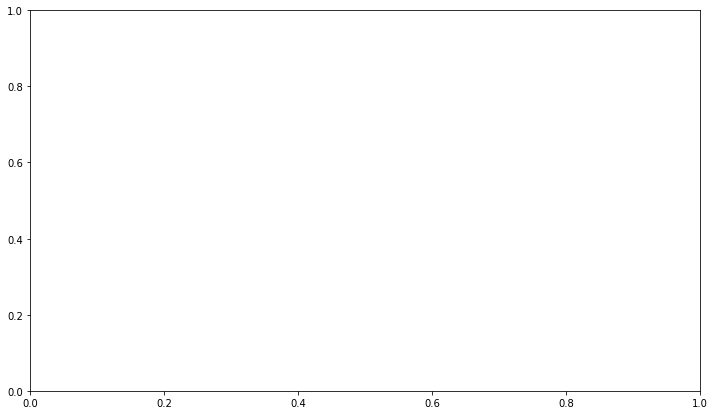

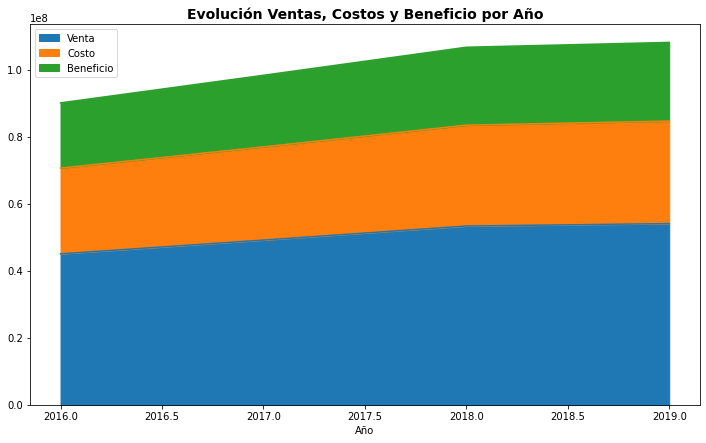

In [35]:
tp=df.groupby(by = "Año")["Venta","Costo","Beneficio"].sum()
fix,ax=plt.subplots()
tp.plot(kind="area")
plt.title("Evolución Ventas, Costos y Beneficio por Año", loc="center", fontdict={"fontsize":14, "fontweight":"bold"})
plt.rcParams["figure.figsize"] = (12, 10)
plt.show()

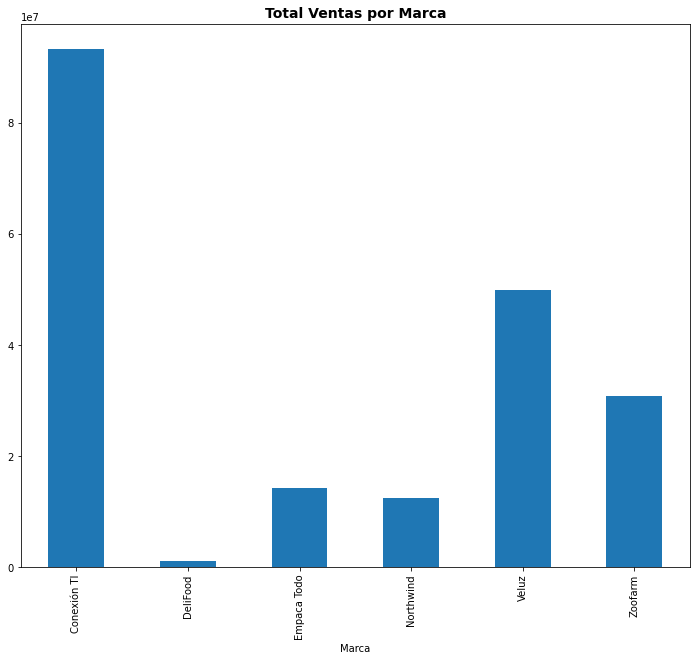

In [38]:
muestra_ventas=df.groupby(by="Marca")["Venta"].sum()
muestra_ventas.plot(kind="bar")
plt.title("Total Ventas por Marca", loc="center", fontdict={"fontsize":14, "fontweight":"bold"})
plt.rcParams["figure.figsize"] = (12, 7)
plt.show()

In [39]:
df.groupby(by="Producto")["Venta"].max() - df.groupby(by="Producto")["Venta"].min() 

Producto
10 mm Plástico de burbujas de doble cara 10m        515.0
32 mm de doble cara de plástico de burbujas 10m     439.0
32 mm de doble cara de plástico de burbujas 5m      208.0
Alien officer hoodie (negro) 3XL                    556.0
Alien officer hoodie (negro) 4XL                    526.0
                                                    ...  
Zapatillas de ogro con pilas (verde) XL            2322.0
Zapatillas de tiburón de felpa (gris) L            2484.0
Zapatillas de tiburón de felpa (gris) M            2556.0
Zapatillas de tiburón de felpa (gris) S            2574.0
Zapatillas de tiburón de felpa (gris) XL           2412.0
Name: Venta, Length: 227, dtype: float64

In [40]:
df.groupby(by = ["Producto","Vendedor"])["Venta"].sum()

Producto                                      Vendedor
10 mm Plástico de burbujas de doble cara 10m  Bradyn       10383.0
                                              Brent        10637.0
                                              Colt         17490.0
                                              David         4848.0
                                              Domingo      12866.0
                                                            ...   
Zapatillas de tiburón de felpa (gris) XL      Maribel      74934.0
                                              Martin       50300.0
                                              Mohamed     121788.0
                                              Nick         71829.0
                                              Paula        73660.0
Name: Venta, Length: 4313, dtype: float64

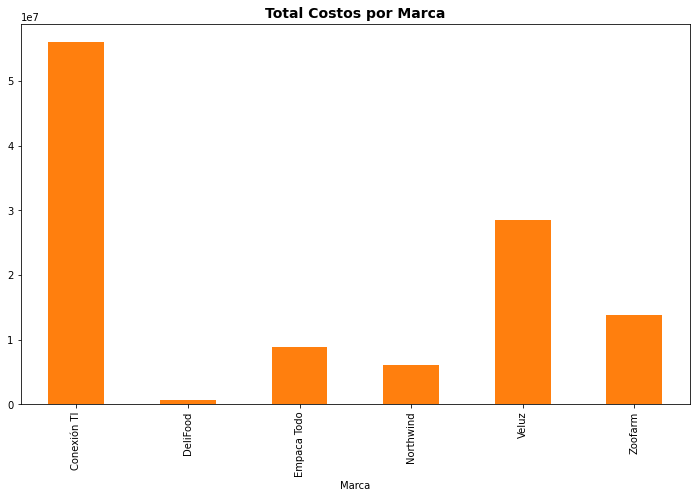

In [41]:
muestra_costo=df.groupby(by="Marca")["Costo"].sum().head(10)
muestra_costo.plot(kind="bar",color="tab:orange")
plt.title("Total Costos por Marca", loc="center", fontdict={"fontsize":14, "fontweight":"bold"})
plt.rcParams["figure.figsize"] = (12, 7)
plt.show()

In [42]:
df.groupby(by="Vendedor")["Beneficio"].sum()

Vendedor
Bradyn      4358738.0
Brent       5022020.0
Colt        5980158.0
David       2543694.0
Domingo     5613221.0
Glen        5696220.0
Gregorio    2947785.0
Ivy         5424166.0
Jacinto     6069788.0
Kaelyn      6908479.0
Kaley       3476184.0
Leo         4463805.0
Lilly       2981230.0
Mara        1629952.0
Maribel     4855105.0
Martin      2897165.0
Mohamed     7836395.0
Nick        3924861.0
Paula       4949695.0
Name: Beneficio, dtype: float64

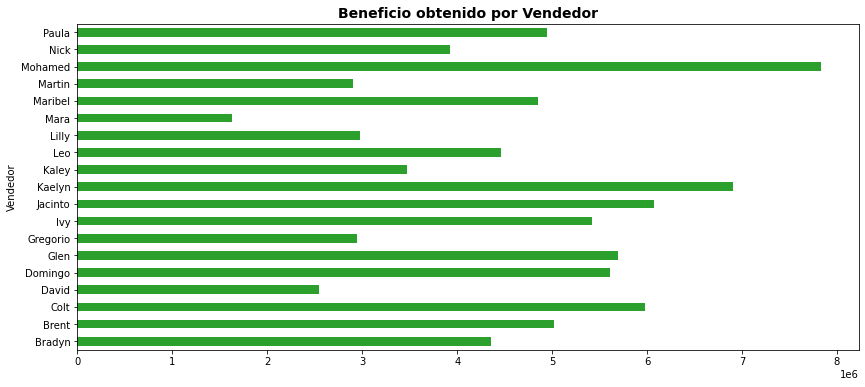

In [43]:
muestra_beneficio=df.groupby(by="Vendedor")["Beneficio"].sum()
fix,ax=plt.subplots(figsize=(14,6))
muestra_beneficio.plot(kind="barh", color="tab:green")
plt.title("Beneficio obtenido por Vendedor", loc="center", fontdict={"fontsize":14, "fontweight":"bold"})
plt.rcParams["figure.figsize"] = (12, 7)
plt.show()

**30) Se crea una función que recibe una marca y una fecha y devuelve una serie con todas las ventas de esa marca en todos los países en esa fecha.**


In [44]:
def resumen_venta(df, marca, fecha):
  venta_marca = df[(df.Marca == marca) & (df.Fecha == fecha)]
  return pd.Series(list(venta_marca.Venta), index=venta_marca.País)

In [45]:
resumen_venta(df,"Zoofarm","2016-01-12")


País
Estados Unidos de América    1080.0
Estados Unidos de América    1728.0
Estados Unidos de América    1512.0
Estados Unidos de América     648.0
Estados Unidos de América    1512.0
España                       1512.0
Perú                         1512.0
Argentina                     648.0
Ecuador                      1512.0
España                       1296.0
España                       1296.0
México                        648.0
México                       1944.0
Brasil                        216.0
Estados Unidos de América    1944.0
Guatemala                    1080.0
México                       2160.0
México                       1944.0
Puerto Rico                  2160.0
España                        280.0
España                       1944.0
España                        216.0
España                       1728.0
España                       2160.0
Estados Unidos de América    1296.0
dtype: float64

**31) Se crea una función que recibe una vendedor, un producto y un año y devuelve una serie con las ventas de ese producto por ese vendedor en en esa fecha.**



In [46]:
def evolucion_producto_cantidad (df, vendedor, producto, año):
  venta_filtro = df[(df.Vendedor == vendedor) & (df.Producto == producto) & (df.Año == año)]
  return pd.Series(list(venta_filtro.Venta), index=venta_filtro.Vendedor)

  


In [47]:
evolucion_producto_cantidad(df,"Maribel", 'Zapatillas de tiburón de felpa (gris) XL', 2016)


Vendedor
Maribel    1296.0
Maribel     216.0
Maribel    1080.0
Maribel     648.0
Maribel    1728.0
Maribel    1296.0
Maribel    1080.0
Maribel    1512.0
Maribel    2160.0
Maribel     648.0
Maribel    1944.0
Maribel     648.0
Maribel     648.0
Maribel     648.0
Maribel    1296.0
Maribel    1080.0
Maribel     216.0
Maribel    2160.0
dtype: float64

**32) Análisis de datos extremos de la columna Costo**





In [48]:
x = df ["Costo"]
Q1 = np.percentile(x,25)
Q3 = np.percentile (x,75)
rangointer = Q3-Q1
umbralsuperior = Q3 + 1.5*rangointer
umbralinferior = Q3 - 1.5*rangointer

In [49]:
umbralsuperior

1064.0

In [50]:
umbralinferior

-142.0

In [51]:
np.mean(x > umbralsuperior) * 100

9.187308362893045

In [52]:
np.mean(x < umbralinferior) * 100

0.0

**33) Análisis de datos extremos en la columna Venta**

In [53]:
x = df ["Venta"]
Q1 = np.percentile(x,25)
Q3 = np.percentile (x,75)
rangointer = Q3-Q1
umbralsuperior = Q3 + 1.5*rangointer
umbralinferior = Q3 - 1.5*rangointer

In [54]:
umbralsuperior

2014.5

In [55]:
umbralinferior

-286.5

In [56]:
np.mean(x > umbralsuperior) * 100

8.91788913605483

In [57]:
np.mean(x < umbralinferior) * 100

0.0

**34) Correlación entre todas las variables con Pandas**





In [59]:
corr= df.corr()
corr.style.background_gradient()

,Año,Cantidad,Venta,Costo,Beneficio
Año,1.000000,-0.002916,0.005054,0.003799,0.005838
Cantidad,-0.002916,1.000000,0.224053,0.174677,0.249900
Venta,0.005054,0.224053,1.000000,0.943661,0.878990
Costo,0.003799,0.174677,0.943661,1.000000,0.671674
Beneficio,0.005838,0.249900,0.878990,0.671674,1.000000


**35) Relación entre la variable Venta y Costo**


A continuación se realizarán una serie de análisis sobre la relación entre la variable "Costo" y la variable "Venta" tomando como variable independiente a la primera y como variable dependiente a la segunda.

In [65]:
np.corrcoef(df["Venta"],df["Costo"])

array([[1.        , 0.94366068],
       [0.94366068, 1.        ]])

In [66]:
x= df["Costo"]
y= df ["Venta"]
slope, intercept, r, p, std_err = stats.linregress(x, y)
r

0.9436606792532568

El coeficiente de correlación para estas variables es de 0.94, lo que indica que hay una relación alta entre las mismas

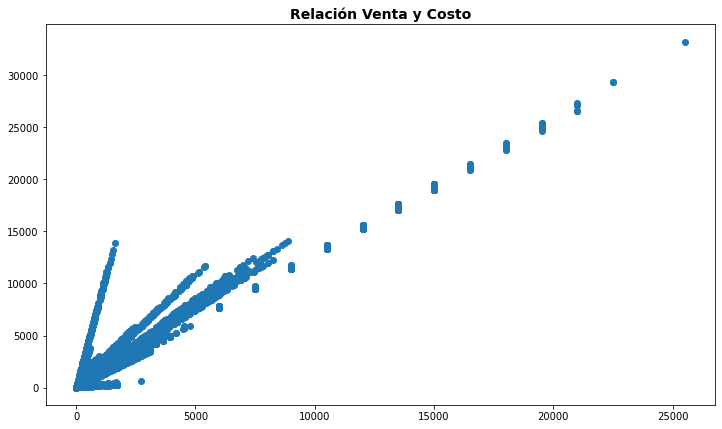

In [67]:
plt.scatter(x, y)
plt.title("Relación Venta y Costo", loc="center", fontdict={"fontsize":14, "fontweight":"bold"})
plt.rcParams["figure.figsize"] = (12, 7)
plt.show()


Se observa que hay una relación lineal positiva entre la variable independiente "Costo" y la variable dependiente "Venta", dado que ambas variables aumentan a un ritmo constante y esta relación se puede representar a través de un modelo de regresión lineal 

In [62]:

X = df[["Costo"]]
y = df ["Venta"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

lr = linear_model.LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

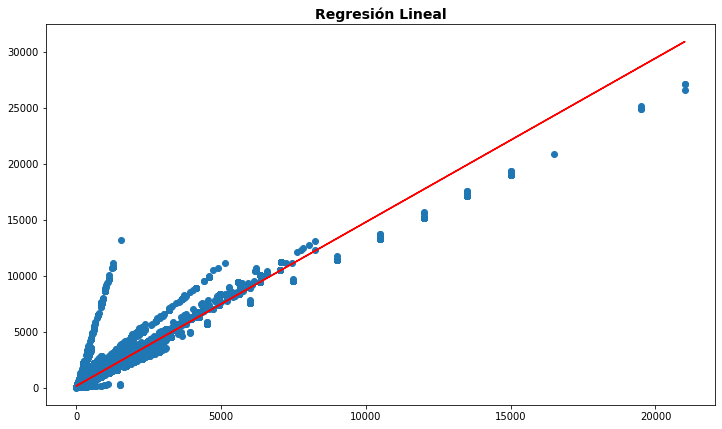

In [68]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color="red")
plt.title("Regresión Lineal", loc="center", fontdict={"fontsize":14, "fontweight":"bold"})
plt.rcParams["figure.figsize"] = (12, 7)
plt.show()

In [69]:
print("Datos del modelo de Regresión Simple")
print("Valor de la pendiente o coeficiente a: ")
print(lr.coef_)
print("Valor de intersección o coeficiente b: ")
print(lr.intercept_)
print("La ecuación del modelo es igual a: ")
print("y= ", lr.coef_, "x +", lr.intercept_)
print("Precisión del modelo: ")
print(lr.score(X_train,y_train))


Datos del modelo de Regresión Simple
Valor de la pendiente o coeficiente a: 
[1.46502846]
Valor de intersección o coeficiente b: 
128.8948032099761
La ecuación del modelo es igual a: 
y=  [1.46502846] x + 128.8948032099761
Precisión del modelo: 
0.8920211362216279


**36) Predecir valores futuros de las Ventas en base a los Costos**


Se observa que para un costo de un producto de 90 se espera un ingreso por venta de 261

In [70]:
def myfunc(x):
  return slope * x + intercept
venta = myfunc(90)
venta

261.1724450091783